# Girando dados com matrizes mudança de base

## Passo 1: Escolha os dados ou gere alguns

In [61]:
import pandas as pd

# escolhi os dados das flores da espécie iris
dados = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data', header=None)
dados.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# veja as 3 primeiras linhas
dados.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Passo 2: Escolha duas colunas

In [62]:
colunas_escolhidas = dados[['sepal_length', 'sepal_width']]

## Passo 3: Transforme a tabela em uma matriz com duas colunas

In [63]:
colunas_escolhidas = colunas_escolhidas.values
# conferindo as dimensões da matriz
# A sua poderá ter mais ou menos linhas
colunas_escolhidas.shape

(150, 2)

## Passo 4: Faça o gráfico (x: coluna 1, y: coluna 2)

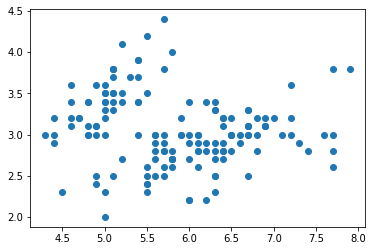

In [64]:
import matplotlib.pyplot as plt
x = colunas_escolhidas[:,0]
y = colunas_escolhidas[:,1]
plt.scatter(x, y)
plt.show()

## Passo 5: Escolha o tamanho dos eixos

In [65]:
# se no resultado final, o gráfico cortar, aumente o epsilon
# senão, deixe tudo como está e vá para o próximo passo
epsilon = 2
maior_valor = max(abs(x.max()), abs(x.min()), abs(y.max()), abs(y.min()))+epsilon
x_max = maior_valor
x_min = -maior_valor
y_max = maior_valor
y_min = -maior_valor

## Passo 6: Defina a matriz mudança de base da rotação

Fazendo

$$(x,y) = \tilde{x} (cos(\theta),sen(\theta)) + \tilde{y} (-sen(\theta),cos(\theta))$$

temos que a matriz de mudança de base fica

$$
\left(\begin{array}{c}
\tilde{x} \\ \tilde{y}
\end{array}\right) = 
\left(\begin{array}{cc}
cos(\theta) & sen(\theta) \\ -sen(\theta) & cos(\theta)
\end{array}\right)
\left(\begin{array}{c}
x \\ y
\end{array}\right)
$$

## Passo 7: Gire os dados usando a matriz e faça o gráfico

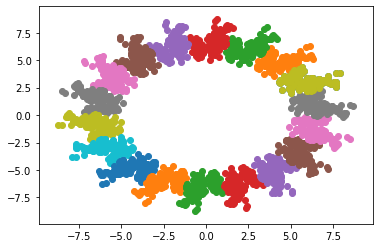

In [66]:
# Relax! Se tudo deu certo até aqui é só copiar, colar e ser feliz!

import numpy as np

# giraremos em 0, 20, 40, ..., 360 graus
for graus in range(0,361,20):

  angle = (graus/360) * 2 * np.pi       # convertendo para radianos
  matriz_mudanca_de_base = np.array([ 
    [np.cos(angle),np.sin(angle)],
    [-np.sin(angle),np.cos(angle)]
  ])
  dados_rotacionados = np.matmul(colunas_escolhidas, matriz_mudanca_de_base)
  x = dados_rotacionados[:,0]
  y = dados_rotacionados[:,1]
  plt.scatter(x, y)
  plt.xlim([x_min, x_max])
  plt.ylim([y_min, y_max])
plt.show()